#### This code is a modification of the code used in the Loan Prediction project found here: https://bit.ly/35M3z5p

## Below are modules needed when using the function, and some optional modules

In [ ]:
# Important Modules
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import metrics

# Modules needed depending on ML model Used
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Optional Modules
import seaborn as sns
plt.style.use('seaborn-dark')
sns.set()

## The All in one classification function

In [ ]:
#Generic function for making classification model and accessing performance


def classification_model(model, data, predictors, outcome):
    
    
    X = data[predictors]
    y = data[outcome]
    
    #Perform stratified k-fold cross-validation with 5 folds
    
    skf = StratifiedKFold()

    print(f'\n[number of cross validation splits = {skf.get_n_splits(data)}]\n\n')
    
    accuracy_train_hold = []
    accuracy_test_hold = []
    finder = str(model).find('(')
    col = X.columns.values.reshape(-1,1)
    
    
    for train_index, test_index in skf.split(X, y):
        
        #Filter training data
        train_features = X.iloc[train_index,:]
        
        #Filter the target variables
        train_target = y.iloc[train_index]
         
        #Filter testing data
        test_features = X.iloc[test_index,:]
        
        #Filter the target test variables
        test_target = y.iloc[test_index]
        
        
        #Fit the model
        model.fit(train_features,train_target)
        
        #Make predictions on the training set
        predictions_train = model.predict(train_features)
        
        #Record accuracy rom each cross-validation run of train
        accuracy_train = metrics.accuracy_score(predictions_train, train_target)
        accuracy_train_hold.append(accuracy_train)
        
        #Make predictions on the testing set
        predictions_test = model.predict(test_features)

        #Record accuracy rom each cross-validation run of test
        accuracy_test = metrics.accuracy_score(predictions_test, test_target)
        accuracy_test_hold.append(accuracy_test)
        
 
        
    #Print out train classification report title
    print('      '*4 + '### TRAIN SUMMARY ###\n\n')
    
    #Print out the train classification report
    print('\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                     metrics.classification_report(train_target,predictions_train)))
    
    #Print out the train confusion matrix
    
    _confusion_matrix_train = pd.DataFrame(confusion_matrix(train_target,predictions_train),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix \n\n',_confusion_matrix_train)
    
    
    
    #Print out the train accuracy
    print('\n\nTrain Accuracy List : {} \n'.format(accuracy_train_hold))
    print('Average Train Accuracy is : {}% \n\n'.format(round(100*np.mean(accuracy_train_hold),3)))
    
    #Print out line that divides train classification report summary from test classification report summary
    print('#'*127) 
    
    #Print out test classification report title
    print('\n\n','      '*4 + '### TEST SUMMARY ###\n\n')
    
    #Print out the test classification report
    print('\n\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                     metrics.classification_report(test_target,predictions_test)))
    

    #Print out the test confusion matrix
    
    _confusion_matrix_test = pd.DataFrame(confusion_matrix(test_target,predictions_test),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix\n\n',_confusion_matrix_test)
    
    #Print out the test accuracy
    print('\n\nTest Accuracy List: {}%'.format(accuracy_test_hold))
    print('\nAverage Test Accuracy is : {}%'.format(round(100*np.mean(accuracy_test_hold),3)))
    
   
    
    #Display the feature importance for Logistic Regression
    if str(model)[0:finder] == 'LogisticRegression':
        
        #Collecting the coefficients used to get the feature importance
        coef = np.exp(model.coef_[0]).reshape(-1,1)
        stay1 = []
        
        for num in range(len(coef)):
            stay1.append((coef[num][0],col[num][0]))
        new_stay = sorted(stay1, reverse = True)

        stay3 = []
        for val in new_stay:
            stay3.append([val[1],val[0]])
            
        #Display the feature importance as a dataframe
        return(pd.DataFrame(stay3, columns = ['feature','importance']).head(30))
    
    #Display the feature importance for all other models 

    elif str(model)[0:finder] == 'CatBoostClassifier':

        #A pandas series to store the feature importance
        series = pd.Series(model.get_feature_importance,
                           index = range(len(predictors))).sort_values(ascending = False)
        
        #Display the feature importance as a dataframe
        return(pd.DataFrame(np.column_stack([col,series]), columns = ['feature','importance']).head(30))
    

    else:
        
        #A pandas series to store the feature importance
        series = pd.Series(model.feature_importances_,
                           index = range(len(predictors))).sort_values(ascending = False)
        
        #Display the feature importance as a dataframe
        return(pd.DataFrame(np.column_stack([col,series]), columns = ['feature','importance']).head(30))
    
                            
    
        

- How to call the function:

#### classification_model(model, data, predictors, outcome)

- Model: This is the model you chose to use to do your predictions
- Data: This is your processed dataset 
- Predictors: These are the columns of the dataset you're going to use to predict the outcome of the target column
- Outcome: This is the target column of the dataset

### An example of the function being used

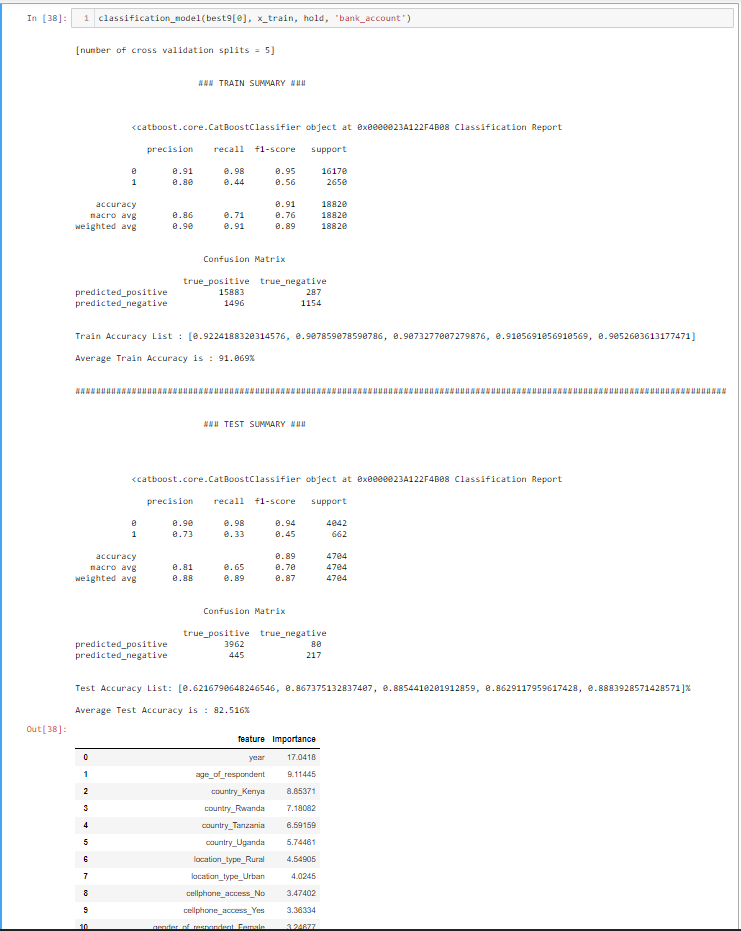